In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'output'

In [3]:
name_class = os.listdir(file_path)
name_class

['.DS_Store', 'real', 'fake']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['output/real/0026_face_3.png',
 'output/real/0037_face_1.png',
 'output/real/0011_face_3.png',
 'output/real/0000_face_1.png',
 'output/real/0044_face_3.png',
 'output/real/0004_face_10.png',
 'output/real/0019_face_5.png',
 'output/real/0008_face_7.png',
 'output/real/0042_face_8.png',
 'output/real/0023_face_6.png',
 'output/real/0032_face_4.png',
 'output/real/0014_face_6.png',
 'output/real/0005_face_4.png',
 'output/real/0020_face_8.png',
 'output/real/0017_face_8.png',
 'output/real/0041_face_6.png',
 'output/real/0041_face_7.png',
 'output/real/0017_face_9.png',
 'output/real/0020_face_9.png',
 'output/real/0005_face_5.png',
 'output/real/0014_face_7.png',
 'output/real/0032_face_5.png',
 'output/real/0023_face_7.png',
 'output/real/0042_face_9.png',
 'output/real/0008_face_6.png',
 'output/real/0019_face_4.png',
 'output/real/0018_face_10.png',
 'output/real/0044_face_2.png',
 'output/real/0011_face_2.png',
 'output/real/0026_face_2.png',
 'output/real/0037_face_2.png',
 'outp

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,output/fake/0009_fake_face_3.png,fake
1,output/fake/0010_fake_face_7.png,fake
2,output/real/0045_face_9.png,real
3,output/real/0005_face_6.png,real
4,output/fake/0011_fake_face_7.png,fake


In [8]:
#balancing

/var/folders/4g/zybzsq214dl32x5jzrgwnx6w0000gn/T/ipykernel_865/3973629427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette="viridis")


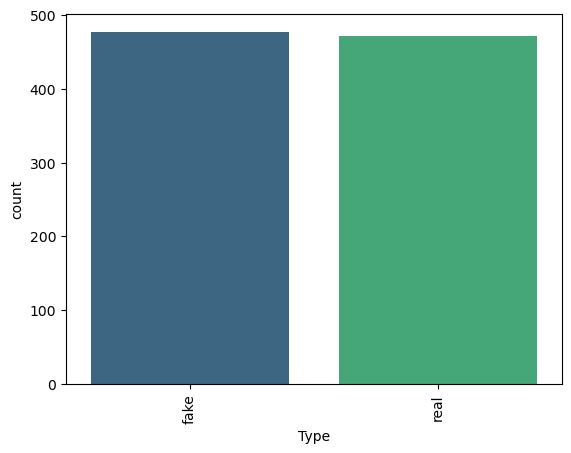

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts, palette="viridis") 
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [12]:
test, val = train_test_split(test, test_size=0.50, random_state=42)

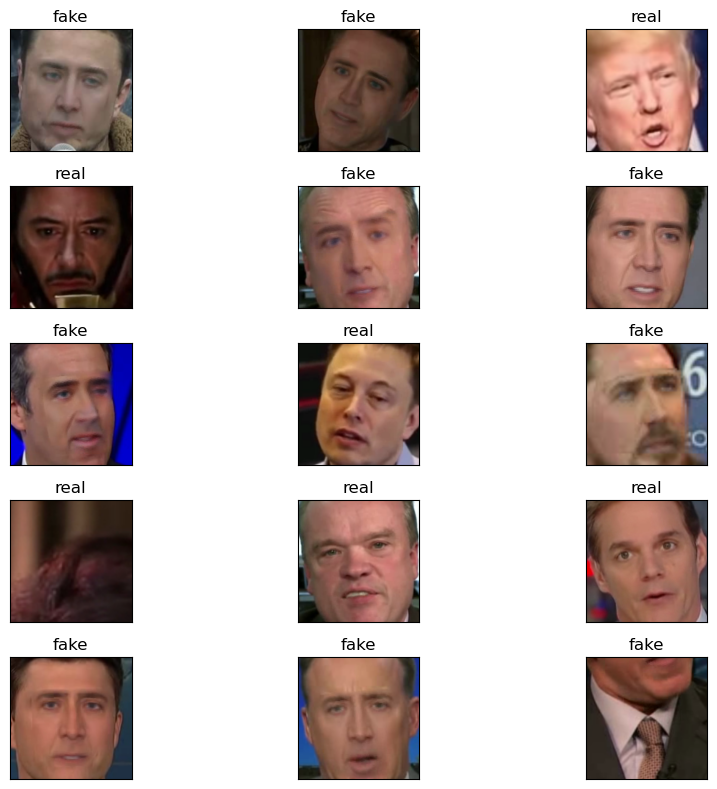

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=val,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 711 validated image filenames belonging to 2 classes.
Found 119 validated image filenames belonging to 2 classes.
Found 118 validated image filenames belonging to 2 classes.


In [16]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Load pretrained ResNet50
resnet50_model = ResNet50(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Load pretrained EfficientNetB0
efficientnet_model = EfficientNetB0(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze both pretrained models
resnet50_model.trainable = False
efficientnet_model.trainable = False

# Create inputs
inputs = Input(shape=(100, 100, 3))

# Pass inputs through both models
resnet_output = resnet50_model(inputs)
efficientnet_output = efficientnet_model(inputs)

# Concatenate outputs from both models
combined = Concatenate()([resnet_output, efficientnet_output])

# Add custom dense layers on top
x = Dense(128, activation='relu')(combined)
x = Dense(128, activation='relu')(x)

# Output layer for 2-class classification
outputs = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model (optional)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2048)      │ 23,587,712 │ input_layer_2[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 1280)      │  4,049,571 │ input_layer_2[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3328)      │          0 │ resnet50[0][0],   │
│ (Concatenate)       │                   │            │ efficientnetb0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    426,112 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2)         │        258 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,080,165 (107.12 MB)

 Trainable params: 442,882 (1.69 MB)

 Non-trainable params: 27,637,283 (105.43 MB)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5604 - loss: 0.7639 - val_accuracy: 0.7815 - val_loss: 0.4993
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8158 - loss: 0.4197 - val_accuracy: 0.8403 - val_loss: 0.3284
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8689 - loss: 0.2932 - val_accuracy: 0.8655 - val_loss: 0.3359
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8765 - loss: 0.2725 - val_accuracy: 0.8739 - val_loss: 0.2769
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9393 - loss: 0.1405 - val_accuracy: 0.8487 - val_loss: 0.2697
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9420 - loss: 0.1243 - val_accuracy: 0.8908 - val_loss: 0.2614
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9643 - loss: 0.1007 - val_accuracy: 0.8824 - val_loss: 0.2865
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9658 - loss: 0.0772 - val_accuracy: 0.8655 - val_loss: 0.3165
Epo

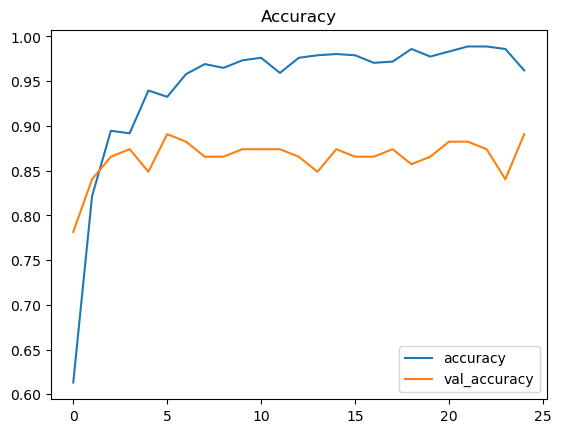

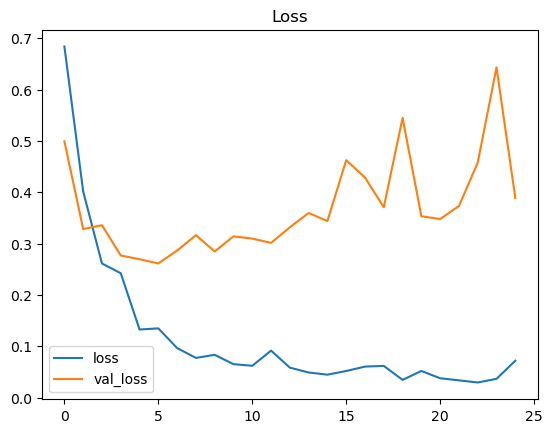

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 0.31199
Test Accuracy: 91.53%


In [22]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step 


In [23]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.95      0.89      0.92        61
        real       0.89      0.95      0.92        57

    accuracy                           0.92       118
   macro avg       0.92      0.92      0.92       118
weighted avg       0.92      0.92      0.92       118



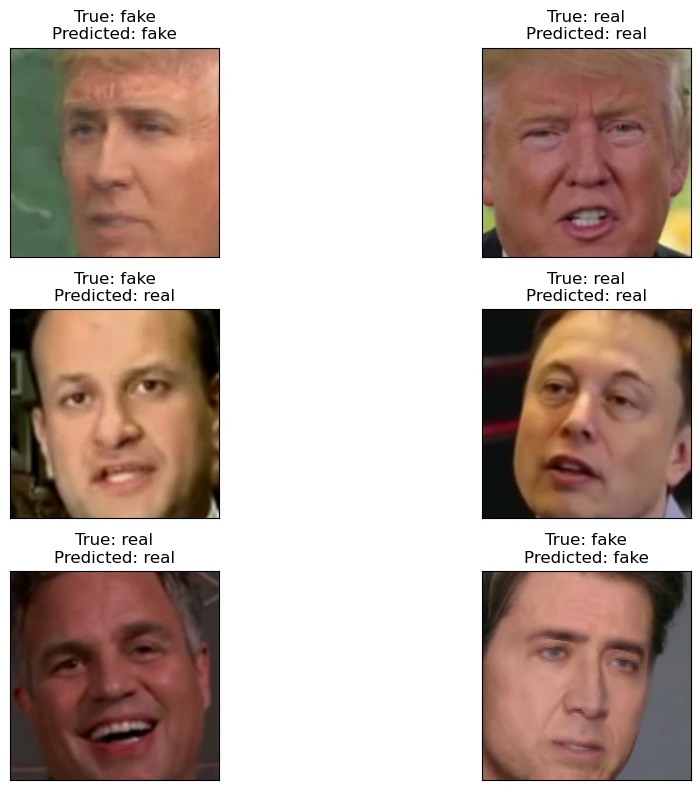

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [25]:
model.save_weights("model_resnet50_efficientnet.weights.h5")

In [26]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Rebuild the model architecture
resnet50_model = ResNet50(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')
efficientnet_model = EfficientNetB0(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')

# Freeze layers
resnet50_model.trainable = False
efficientnet_model.trainable = False

# Create inputs and ensemble architecture
inputs = Input(shape=(100, 100, 3))
resnet_output = resnet50_model(inputs)
efficientnet_output = efficientnet_model(inputs)
combined = Concatenate()([resnet_output, efficientnet_output])
x = Dense(128, activation='relu')(combined)
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model1 = Model(inputs=inputs, outputs=outputs)

# Load the weights
model1.load_weights("model_resnet50_efficientnet_weights.h5")


In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/output/real/0000_face_2.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model1.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[  0 100]]


In [28]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/static/q_images/real/0001_face_2.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model1.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[ 0 99]]


In [29]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 99]


In [30]:
print("Largest element is:", max(pp))

Largest element is: 99


In [31]:
index = pp.index(max(pp))

In [32]:
name_class=["fake","real"]

In [33]:
name_class[index]

'real'

In [34]:
import matplotlib.pyplot as plt

In [35]:
plt.imread(img_path)

array([[[0.08235294, 0.16078432, 0.36862746],
        [0.05098039, 0.11372549, 0.30588236],
        [0.08235294, 0.07843138, 0.20784314],
        ...,
        [0.23137255, 0.23137255, 0.3764706 ],
        [0.22352941, 0.25490198, 0.4745098 ],
        [0.23529412, 0.2784314 , 0.50980395]],

       [[0.07450981, 0.14509805, 0.34509805],
        [0.04705882, 0.10196079, 0.28627452],
        [0.08235294, 0.07450981, 0.19607843],
        ...,
        [0.21960784, 0.21960784, 0.35686275],
        [0.21568628, 0.24705882, 0.45490196],
        [0.22745098, 0.27058825, 0.49411765]],

       [[0.07450981, 0.12941177, 0.2901961 ],
        [0.05490196, 0.09411765, 0.24313726],
        [0.09019608, 0.07450981, 0.16862746],
        ...,
        [0.21568628, 0.20392157, 0.30980393],
        [0.21568628, 0.23921569, 0.40784314],
        [0.23529412, 0.26666668, 0.45490196]],

       ...,

       [[0.00392157, 0.00392157, 0.54509807],
        [0.00392157, 0.00392157, 0.54901963],
        [0.00392157, 0

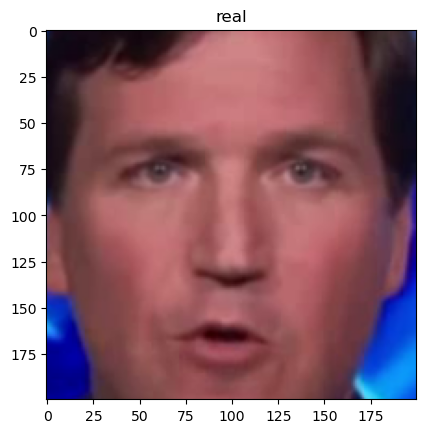

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()